# Pheatmap representing combined results from meta expression, meta GWAS, integrative analysis and enrichment of meta expr.

Here we visualise the pathways representing the top differentially expressed genes after the GWES meta analysis. Enriching the plot with the pvalues obtained for those genes in the GWAS Meta Analysis and Integrative Analysis of this two.

## Read datasets

In [1]:
# GWAS METAL
gwas_resultE3<-read.table("/mnt/Almacen6/Adapted/jupyterAnalisis_others/Meta_Stage_I_Stage_II/GRACEprobable_GERADapr/Magma/StageI_II.GRACEprob.GERADapr.ApoE3.stderr.lnOR.TBL_six_both.maf.05.SNP.LOC.200kb.genes.annot.sorted.HGNC",header=TRUE)
dim(gwas_resultE3)
head(gwas_resultE3,n=3L)

[1] 18221    14

RANK,GENE,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT,P_JOINT,P_SNPWISE_MEAN,P_SNPWISE_TOP1,STRAND,HUGO
1,57713,10,7000586,7653448,1674,160,10000,4.4744,3.8314e-06,9.0305e-07,0.0024449,-,SFMBT2
2,117157,1,162165056,162581928,854,90,10000,4.3985,5.4508e-06,2.7958e-06,0.0033617,-,SH2D1B
3,400793,1,162148696,162556608,874,89,10000,4.2575,1.0336e-05,4.5441e-06,0.0043538,+,C1orf226


In [2]:
names(gwas_resultE3)[2]="GENEID"
names(gwas_resultE3)[14]="genesymbol"
names(gwas_resultE3)

[1] "RANK"           "GENEID"         "CHR"            "START"         
 [5] "STOP"           "NSNPS"          "NPARAM"         "N"             
 [9] "ZSTAT"          "P_JOINT"        "P_SNPWISE_MEAN" "P_SNPWISE_TOP1"
[13] "STRAND"         "genesymbol"

In [3]:
# GWES MetaDE
expr_resultE3<-read.table("/mnt/Almacen6/Adapted/jupyterAnalisis_others/Meta_DE_All_Genes/StageI_II/cortex/L3-GWES-STAGE_I_II-CORTEX.MetaDE.ApoE3.csv",sep=",",header=TRUE)
expr_resultE3<-expr_resultE3[!(is.na(expr_resultE3$Fisher.Pvalue)), ] # removing or not genes with NA ficher does not have any effect on the merge dataset
dim(expr_resultE3) 
head(expr_resultE3,n=3L)

[1] 18715    10

X,rankE3,logFC..case.vs.ctl.,Var,Qpvalue,REM.Pvalue,REM.FDR,Fisher.Pvalue,Fisher.FDR,n.estimators
VEZF1,1,0.31808111,0.005416184,1.278370e-04,1.545763e-05,0.00350056,0.000000e+00,0.000000e+00,11
LANCL2,2,-0.02168236,0.003314690,7.193712e-13,7.064679e-01,0.91494234,1.820100e-12,1.703158e-08,11
AP1S1,3,-0.06689675,0.006172052,1.438838e-12,3.944856e-01,0.75741050,3.889666e-12,2.150089e-08,11


In [4]:
names(expr_resultE3)[1]="genesymbol"
names(expr_resultE3)

[1] "genesymbol"          "rankE3"              "logFC..case.vs.ctl."
 [4] "Var"                 "Qpvalue"             "REM.Pvalue"         
 [7] "REM.FDR"             "Fisher.Pvalue"       "Fisher.FDR"         
[10] "n.estimators"

In [5]:
# Integrative
RRA.E3=read.table("/mnt//Almacen6/Adapted//jupyterAnalisis_others/Integrative_analysis/Stage_I_Stage_II//GWAS_Cortex/L3-INTEGRA-STAGE_I_II-CORTEX.RRA.ApoE3.tsv",header=T)
dim(RRA.E3)
head(RRA.E3,n=3)

[1] 21274     3

rankE3,Name,Score
1,SH2D1B,0.000109763
2,VEZF1,0.000213727
3,SFMBT2,0.000219521


In [6]:
names(RRA.E3)[2]="genesymbol"
names(RRA.E3)

[1] "rankE3"     "genesymbol" "Score"

In [7]:
# GO dataframe (combined result from Webgestalt and GOplot. GOplot removes redundant terms and calculates zscore )
enrich.E3=read.table("/mnt/Almacen6/Adapted/jupyterAnalisis_others//Meta_DE_All_Genes/StageI_II/cortex/Enrichments/Renrich_plots/CORTEX.MetaDE.ApoE3_GOdataframe")
dim(enrich.E3)
head(enrich.E3,n=3)

[1] 196   8

category,ID,term,count,genes,logFC,adj_pval,zscore
BP,GO:0031346,positive regulation of cell projection organization,15,ACTR2,0.007593696,7.560775e-07,-0.2581989
BP,GO:0031346,positive regulation of cell projection organization,15,ADCYAP1,-0.207415668,7.560775e-07,-0.2581989
BP,GO:0031346,positive regulation of cell projection organization,15,MARK2,0.052524316,7.560775e-07,-0.2581989


In [8]:
names(enrich.E3)[5]="genesymbol"
enrich.E3$cat_term=paste(enrich.E3$category,enrich.E3$term,sep=":")
head(enrich.E3,n=3)

category,ID,term,count,genesymbol,logFC,adj_pval,zscore,cat_term
BP,GO:0031346,positive regulation of cell projection organization,15,ACTR2,0.007593696,7.560775e-07,-0.2581989,BP:positive regulation of cell projection organization
BP,GO:0031346,positive regulation of cell projection organization,15,ADCYAP1,-0.207415668,7.560775e-07,-0.2581989,BP:positive regulation of cell projection organization
BP,GO:0031346,positive regulation of cell projection organization,15,MARK2,0.052524316,7.560775e-07,-0.2581989,BP:positive regulation of cell projection organization


## Prepare dataset with the variables needed

In [9]:
pheatmap.merge=Reduce(function(x, y) merge(x, y, by="genesymbol"), list(gwas_resultE3,expr_resultE3,RRA.E3,enrich.E3))
dim(pheatmap.merge)
head(pheatmap.merge)

[1] 191  33

genesymbol,RANK,GENEID,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT,...,rankE3.y,Score,category,ID,term,count,logFC,adj_pval,zscore,cat_term
ACP1,2335,52,2,64869,478283,708,60,10000,0.894400,...,644,0.03284425,CC,GO:0098562,cytoplasmic side of membrane,6,-0.088259870,1.693486e-03,0.8164966,CC:cytoplasmic side of membrane
ACP1,2335,52,2,64869,478283,708,60,10000,0.894400,...,644,0.03284425,CC,GO:0098552,side of membrane,9,-0.088259870,2.849047e-03,1.6666667,CC:side of membrane
ACTR2,7613,10097,2,65254829,65698387,906,64,10000,0.015139,...,446,0.02195385,CC,GO:0015629,actin cytoskeleton,12,0.007593696,1.275399e-04,2.3094011,CC:actin cytoskeleton
ACTR2,7613,10097,2,65254829,65698387,906,64,10000,0.015139,...,446,0.02195385,BP,GO:0010720,positive regulation of cell development,18,0.007593696,8.753904e-07,0.0000000,BP:positive regulation of cell development
ACTR2,7613,10097,2,65254829,65698387,906,64,10000,0.015139,...,446,0.02195385,BP,GO:0031346,positive regulation of cell projection organization,15,0.007593696,7.560775e-07,-0.2581989,BP:positive regulation of cell projection organization
ACTR2,7613,10097,2,65254829,65698387,906,64,10000,0.015139,...,446,0.02195385,CC,GO:0030055,cell-substrate junction,15,0.007593696,2.125339e-07,2.3237900,CC:cell-substrate junction


In [10]:
length(unique(pheatmap.merge$genesymbol)) 

[1] 71

In [11]:
names(pheatmap.merge)

[1] "genesymbol"          "RANK"                "GENEID"             
 [4] "CHR"                 "START"               "STOP"               
 [7] "NSNPS"               "NPARAM"              "N"                  
[10] "ZSTAT"               "P_JOINT"             "P_SNPWISE_MEAN"     
[13] "P_SNPWISE_TOP1"      "STRAND"              "rankE3.x"           
[16] "logFC..case.vs.ctl." "Var"                 "Qpvalue"            
[19] "REM.Pvalue"          "REM.FDR"             "Fisher.Pvalue"      
[22] "Fisher.FDR"          "n.estimators"        "rankE3.y"           
[25] "Score"               "category"            "ID"                 
[28] "term"                "count"               "logFC"              
[31] "adj_pval"            "zscore"              "cat_term"

In [12]:
pheatmap.df=pheatmap.merge[, c(1,12,16,19,25,30,31,32,33)]
head(pheatmap.df,n=3)

genesymbol,P_SNPWISE_MEAN,logFC..case.vs.ctl.,REM.Pvalue,Score,logFC,adj_pval,zscore,cat_term
ACP1,0.083462,-0.088259870,0.1456767,0.03284425,-0.088259870,0.0016934862,0.8164966,CC:cytoplasmic side of membrane
ACP1,0.083462,-0.088259870,0.1456767,0.03284425,-0.088259870,0.0028490465,1.6666667,CC:side of membrane
ACTR2,0.368630,0.007593696,0.9182694,0.02195385,0.007593696,0.0001275399,2.3094011,CC:actin cytoskeleton


In [13]:
names(pheatmap.df)<-c("genesymbol","GWAS_Metal_pvalue","GWES_Meta_logFC","GWES_Meta_pvalue","RRA_pvalue","GO_logFC","GO_pvalue","GO_zscore","GO_term")
head(pheatmap.df,n=3)

genesymbol,GWAS_Metal_pvalue,GWES_Meta_logFC,GWES_Meta_pvalue,RRA_pvalue,GO_logFC,GO_pvalue,GO_zscore,GO_term
ACP1,0.083462,-0.088259870,0.1456767,0.03284425,-0.088259870,0.0016934862,0.8164966,CC:cytoplasmic side of membrane
ACP1,0.083462,-0.088259870,0.1456767,0.03284425,-0.088259870,0.0028490465,1.6666667,CC:side of membrane
ACTR2,0.368630,0.007593696,0.9182694,0.02195385,0.007593696,0.0001275399,2.3094011,CC:actin cytoskeleton


* **NOT NEEDED - separate pheatmap because there are duplicates in genes not allowed in the pheatmap plot **

## pheatmap plot

 - per rows: GO terms (including kegg, reactome..) -  dataframe reduced_circ needed
 - per column: genes - reduced_circ
 - annotation rows (left ): log(pvalue) GoPlot and z-score (per category) - reduced_circ
 - annotation columns (top):  log(value) GWAS METAL, log(pvalue) GWES MetaDE and log(pvalue) integrative
 - cell: logFC MetaDE (same log fc in columns - representing genes)
 
logFC MetaDE is equal to logFC of GO enrichment

### annotations for columns

In [15]:
# Generate annotations for columns
annotation_col = data.frame(
                    MetaGWASp = -log10(unique(pheatmap.df$GWAS_Metal_pvalue)), 
                    MetaGWESp = -log10(unique(pheatmap.df$GWES_Meta_pvalue)),
                    RRAp = -log10(unique(pheatmap.df$RRA_pvalue)) )
rownames(annotation_col) = unique(pheatmap.df$genesymbol)
colnames(annotation_col)=c("-log(MetaGWASpvalue)","-log(MetaGWESpvalue)","-log(RRApvalue)")

In [16]:
head(annotation_col,n=3)

,-log(MetaGWASpvalue),-log(MetaGWESpvalue),-log(RRApvalue)
ACP1,1.0785112,0.83660981,1.483541
ACTR2,0.4334093,0.03702991,1.658489
ADCYAP1,0.6265363,1.80438974,2.892048


In [ ]:
apply(annotation_col, 2, function(x) any(is.infinite(x)))

### annotations for rows, same zscore and p value per term

In [17]:
dim(pheatmap.df)
head(pheatmap.df,n=3)

[1] 191   9

genesymbol,GWAS_Metal_pvalue,GWES_Meta_logFC,GWES_Meta_pvalue,RRA_pvalue,GO_logFC,GO_pvalue,GO_zscore,GO_term
ACP1,0.083462,-0.088259870,0.1456767,0.03284425,-0.088259870,0.0016934862,0.8164966,CC:cytoplasmic side of membrane
ACP1,0.083462,-0.088259870,0.1456767,0.03284425,-0.088259870,0.0028490465,1.6666667,CC:side of membrane
ACTR2,0.368630,0.007593696,0.9182694,0.02195385,0.007593696,0.0001275399,2.3094011,CC:actin cytoskeleton


In [18]:
head(pheatmap.df[pheatmap.df$GO_term=="CC:side of membrane" ,],n=3)

,genesymbol,GWAS_Metal_pvalue,GWES_Meta_logFC,GWES_Meta_pvalue,RRA_pvalue,GO_logFC,GO_pvalue,GO_zscore,GO_term
2,ACP1,0.083462,-0.08825987,0.1456767,0.03284425,-0.08825987,0.002849047,1.666667,CC:side of membrane
17,ANTXR1,0.460650,0.05247301,0.2925577,0.01557203,0.05247301,0.002849047,1.666667,CC:side of membrane
61,DTNA,0.458870,0.16133902,0.1151772,0.04019143,0.16133902,0.002849047,1.666667,CC:side of membrane


In [19]:
# Generate annotations for rows 
annotation_row = data.frame(
                    GOp = -log10(unique(pheatmap.df$GO_pvalue)),
                    GOz = pheatmap.df[!duplicated(pheatmap.df$GO_term),]$GO_zscore)
#rownames(annotation_row) = unique(pheatmap.df$GO_term) # also valid
rownames(annotation_row) =   pheatmap.df[!duplicated(pheatmap.df$GO_term),]$GO_term
colnames(annotation_row)=c("-log(GOpvalue)","GOzscore")

In [22]:
#-log10(0.002849047) correct

In [20]:
head(annotation_row)

,-log(GOpvalue),GOzscore
CC:cytoplasmic side of membrane,2.771218,0.8164966
CC:side of membrane,2.545300,1.6666667
CC:actin cytoskeleton,3.894354,2.3094011
BP:positive regulation of cell development,6.057798,0.0000000
BP:positive regulation of cell projection organization,6.121434,-0.2581989
CC:cell-substrate junction,6.672572,2.3237900


In [ ]:
apply(annotation_row, 2, function(x) any(is.infinite(x)))

### Prepare dataset with data that goes into cells (logFC of Meta GWES (same logFC per gene, so same value per column in heatmap.

Create it from annotation_col and annotation_row to ensure order of genes and terms are the same so the logFC values correspond to the correct gene.

In [23]:
gene.logfc.df=pheatmap.df[, c(which(names(pheatmap.df) %in% c("genesymbol","GWES_Meta_logFC")))]
dim(gene.logfc.df)
gene.logfc.df=unique(gene.logfc.df)
dim(gene.logfc.df)
head(gene.logfc.df,n=3)

[1] 191   2

[1] 71  2

,genesymbol,GWES_Meta_logFC
1,ACP1,-0.088259870
3,ACTR2,0.007593696
8,ADCYAP1,-0.207415668


In [24]:
gene.logfc.df1=gene.logfc.df[,2, drop=F]
rownames(gene.logfc.df1)=gene.logfc.df$genesymbol
dim(gene.logfc.df1)
head(gene.logfc.df1,n=3)

[1] 71  1

,GWES_Meta_logFC
ACP1,-0.088259870
ACTR2,0.007593696
ADCYAP1,-0.207415668


In [25]:
t(gene.logfc.df1)

,ACP1,ACTR2,ADCYAP1,AEBP1,ANK3,ANTXR1,AP1S1,ARHGEF7,BCL6,BDNF,...,SRD5A1,SST,STK38,TBX3,TCF3,TNS1,TTC17,TUBB2A,VWC2,ZBTB20
GWES_Meta_logFC,-0.08825987,0.007593696,-0.2074157,0.1490635,0.02867277,0.05247301,-0.06689675,0.06276443,0.1166447,-0.1619206,...,-0.1049552,-0.2837775,0.03532669,0.05537279,0.08481028,0.1142064,0.1233219,-0.1847108,-0.05234301,0.2790566


In [26]:
nrows=dim(annotation_row)[1] # number of GO terms
cell.data=do.call("rbind", replicate(nrows, t(gene.logfc.df1), simplify = FALSE)) # copy same rows as many times as Go terms are
rownames(cell.data)=rownames(annotation_row)
dim(cell.data)
head(cell.data,n=3)

[1] 21 71

,ACP1,ACTR2,ADCYAP1,AEBP1,ANK3,ANTXR1,AP1S1,ARHGEF7,BCL6,BDNF,...,SRD5A1,SST,STK38,TBX3,TCF3,TNS1,TTC17,TUBB2A,VWC2,ZBTB20
CC:cytoplasmic side of membrane,-0.08825987,0.007593696,-0.2074157,0.1490635,0.02867277,0.05247301,-0.06689675,0.06276443,0.1166447,-0.1619206,...,-0.1049552,-0.2837775,0.03532669,0.05537279,0.08481028,0.1142064,0.1233219,-0.1847108,-0.05234301,0.2790566
CC:side of membrane,-0.08825987,0.007593696,-0.2074157,0.1490635,0.02867277,0.05247301,-0.06689675,0.06276443,0.1166447,-0.1619206,...,-0.1049552,-0.2837775,0.03532669,0.05537279,0.08481028,0.1142064,0.1233219,-0.1847108,-0.05234301,0.2790566
CC:actin cytoskeleton,-0.08825987,0.007593696,-0.2074157,0.1490635,0.02867277,0.05247301,-0.06689675,0.06276443,0.1166447,-0.1619206,...,-0.1049552,-0.2837775,0.03532669,0.05537279,0.08481028,0.1142064,0.1233219,-0.1847108,-0.05234301,0.2790566


In [27]:
cell.data <- cell.data[ order(row.names(cell.data)), ]
head(cell.data,n=3)

,ACP1,ACTR2,ADCYAP1,AEBP1,ANK3,ANTXR1,AP1S1,ARHGEF7,BCL6,BDNF,...,SRD5A1,SST,STK38,TBX3,TCF3,TNS1,TTC17,TUBB2A,VWC2,ZBTB20
BP:cell junction assembly,-0.08825987,0.007593696,-0.2074157,0.1490635,0.02867277,0.05247301,-0.06689675,0.06276443,0.1166447,-0.1619206,...,-0.1049552,-0.2837775,0.03532669,0.05537279,0.08481028,0.1142064,0.1233219,-0.1847108,-0.05234301,0.2790566
BP:cell-substrate junction assembly,-0.08825987,0.007593696,-0.2074157,0.1490635,0.02867277,0.05247301,-0.06689675,0.06276443,0.1166447,-0.1619206,...,-0.1049552,-0.2837775,0.03532669,0.05537279,0.08481028,0.1142064,0.1233219,-0.1847108,-0.05234301,0.2790566
BP:negative regulation of potassium ion transport,-0.08825987,0.007593696,-0.2074157,0.1490635,0.02867277,0.05247301,-0.06689675,0.06276443,0.1166447,-0.1619206,...,-0.1049552,-0.2837775,0.03532669,0.05537279,0.08481028,0.1142064,0.1233219,-0.1847108,-0.05234301,0.2790566


* **if the gene does not belong to a category, the cell value will be 0 (it can not be NA because heatmap fails)**

In [28]:
cell.data2=cell.data

In [29]:
for (i in 1:nrow(cell.data2)){ # GO terms
    genes.in.cat=as.character(enrich.E3[enrich.E3$cat_term==rownames(cell.data2)[i] ,]$genesymbol) # genes in selected Go term
    for (j in 1:ncol(cell.data2)){ # genes
        if(!colnames(cell.data2)[j] %in% genes.in.cat){ # if gene is not in category
            cell.data2[i,j]=0            
        }        
    }
}

In [30]:
head(cell.data2,n=3)

,ACP1,ACTR2,ADCYAP1,AEBP1,ANK3,ANTXR1,AP1S1,ARHGEF7,BCL6,BDNF,...,SRD5A1,SST,STK38,TBX3,TCF3,TNS1,TTC17,TUBB2A,VWC2,ZBTB20
BP:cell junction assembly,0,0,0.0000000,0,0.00000000,0,0,0.06276443,0,0,...,0,0,0,0,0,0.1142064,0,0,0,0
BP:cell-substrate junction assembly,0,0,0.0000000,0,0.00000000,0,0,0.06276443,0,0,...,0,0,0,0,0,0.1142064,0,0,0,0
BP:negative regulation of potassium ion transport,0,0,-0.2074157,0,0.02867277,0,0,0.00000000,0,0,...,0,0,0,0,0,0.0000000,0,0,0,0


In [31]:
enrich.E3[enrich.E3$genesymbol=="ANK3" ,]
as.character(enrich.E3[enrich.E3$cat_term=="BP:negative regulation of potassium ion transport" ,]$genesymbol)

,category,ID,term,count,genesymbol,logFC,adj_pval,zscore,cat_term
120,BP,GO:0043267,negative regulation of potassium ion transport,4,ANK3,0.02867277,1.441305e-04,0.000000,BP:negative regulation of potassium ion transport
166,CC,GO:0016328,lateral plasma membrane,5,ANK3,0.02867277,4.137413e-05,2.236068,CC:lateral plasma membrane
185,CC,GO:0030424,axon,11,ANK3,0.02867277,1.048798e-04,-0.904534,CC:axon
286,CC,GO:0043296,apical junction complex,5,ANK3,0.02867277,2.641899e-03,2.236068,CC:apical junction complex


[1] "ADCYAP1" "PTK2B"   "ANK3"    "CAV1"

In [32]:
cell.data2[, "ANK3"] # correct

BP:cell junction assembly 
                                                                                                        0.00000000 
                                                                               BP:cell-substrate junction assembly 
                                                                                                        0.00000000 
                                                                 BP:negative regulation of potassium ion transport 
                                                                                                        0.02867277 
                                                                        BP:positive regulation of cell development 
                                                                                                        0.00000000 
                                                            BP:positive regulation of cell projection organization 
                                                                                                        0.00000000 
                                                                                             CC:actin cytoskeleton 
                                                                                                        0.00000000 
                                                                                        CC:apical junction complex 
                                                                                                        0.02867277 
                                                                                                           CC:axon 
                                                                                                        0.02867277 
                                                                                                      CC:cell body 
                                                                                                        0.00000000 
                                                                                                    CC:cell cortex 
                                                                                                        0.00000000 
                                                                                              CC:cell leading edge 
                                                                                                        0.00000000 
                                                                                    CC:cell-cell adherens junction 
                                                                                                        0.00000000 
                                                                                        CC:cell-substrate junction 
                                                                                                        0.00000000 
                                                                                   CC:cytoplasmic side of membrane 
                                                                                                        0.00000000 
                                                                                                     CC:filopodium 
                                                                                                        0.00000000 
                                                                                        CC:lateral plasma membrane 
                                                                                                        0.02867277 
                                                                                               CC:receptor complex 
                                                                                                        0.00000000 
                                                                                               CC:side of membrane 
                             

* **pheatmap**

In [2]:
library(pheatmap)

In [233]:
?pheatmap

In [33]:
# in order to know the gaps for the plot
cat=sapply(strsplit(rownames(cell.data),":"),`[`, 1)
table(cat)

cat
BP CC MF 
 5 13  3 

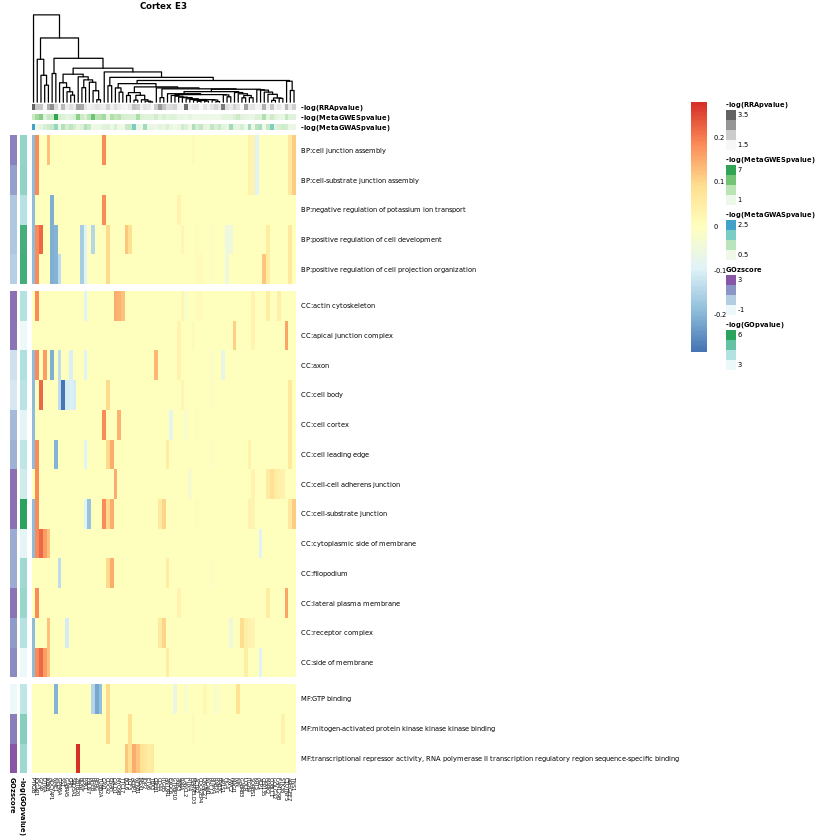

In [38]:
pheatmap(cell.data2, annotation_col = annotation_col, annotation_row = annotation_row,  cluster_rows = FALSE, gaps_row = c(5,18),fontsize = 4, fontsize_row = 4, fontsize_col = 3,main = "Case vs Control")

In [41]:
# dev.copy2pdf ?
pdf(file="pheatmapCaseControl.pdf")
pheatmap(cell.data2, annotation_col = annotation_col, annotation_row = annotation_row,  cluster_rows = FALSE, gaps_row = c(5,18) ,fontsize = 4, fontsize_row = 4, fontsize_col = 3,main = "Case vs Control")
dev.off()

png 
  2

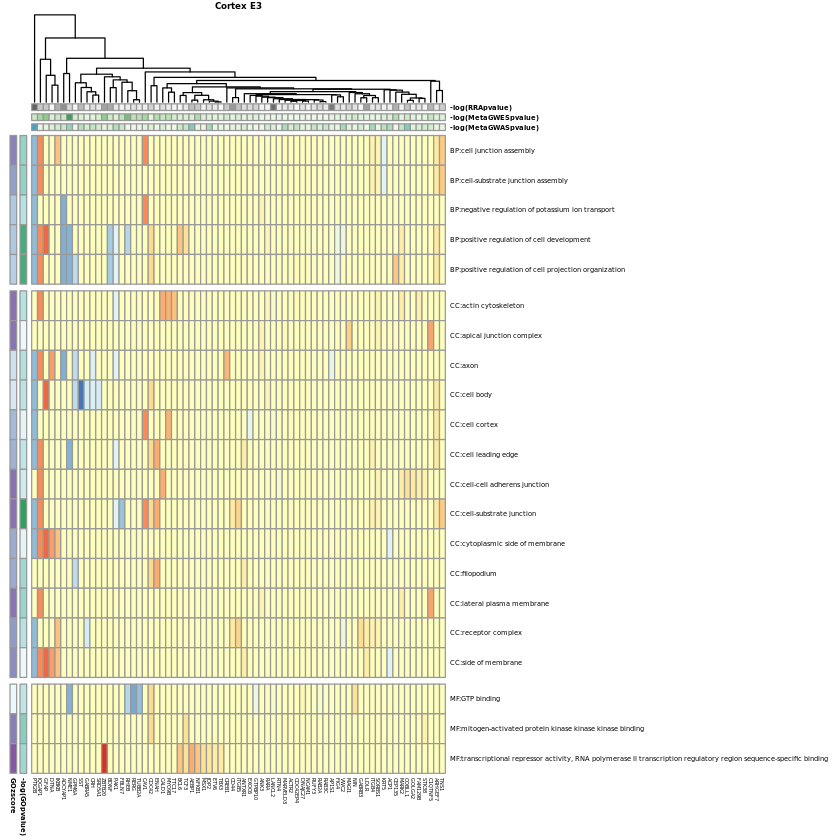

In [42]:
# if leyend=FALSE, the plot is bigger and cell have borders
pheatmap(cell.data2, annotation_col = annotation_col, annotation_row = annotation_row,  cluster_rows = FALSE, gaps_row = c(5,18),fontsize = 4, fontsize_row = 4, fontsize_col = 3,main = "Cortex E3",legend = FALSE,annotation_legend = FALSE)